In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the libraries

### inserting the training set

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
training_set = dataset_train.iloc[:, 1:2].values

In [11]:
training_set
# which is numpy array

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [12]:
%matplotlib inline

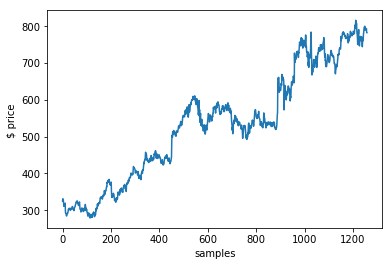

In [16]:
plt.plot(training_set)
plt.xlabel('samples') 
plt.ylabel('$ price ')

In [17]:
from sklearn.preprocessingg import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range= (0,1))

In [20]:
training_set_scaled = sc.fit_transform(training_set)

In [23]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [24]:
training_set_scaled.max()

1.0

In [27]:

training_set_scaled.shape

(1258, 1)

In [69]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [70]:
X_train.shape

(1198, 60)

In [71]:
y_train.shape

(1198,)

In [68]:
a.shape

(2396,)

In [72]:
y_train.shape

(1198,)

In [73]:
# Reshaping

In [74]:
X_train = np.reshape(X_train,
                     (X_train.shape[0], X_train.shape[1] , 1))


In [75]:
X_train.shape

(1198, 60, 1)

In [76]:
X_train.shape

(1198, 60, 1)

In [77]:
# Part 2 - Building the RNN

In [78]:
from keras.models import Sequential

In [79]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [80]:
# Initialising the RNN
regressor = Sequential()

In [81]:
# adding the first LSTM layer and some Dropout regularisation

In [82]:
regressor.add(LSTM(units = 50 , return_sequences = True,
                  input_shape = ( X_train.shape[1] , 1)))

In [83]:
regressor.add(Dropout(0.2))

In [84]:
#Addition  a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))
              

In [85]:
#Addition  a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [86]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [87]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
__________

In [88]:
# Adding the output layer
regressor.add(Dense(units= 1))

In [89]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
__________

In [90]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 26s - loss: 0.0492    
Epoch 2/100
1198/1198 [==============================] - 10s - loss: 0.0077    
Epoch 3/100
1198/1198 [==============================] - 10s - loss: 0.0055    
Epoch 4/100
1198/1198 [==============================] - 9s - loss: 0.0055     
Epoch 5/100
1198/1198 [==============================] - 12s - loss: 0.0050    
Epoch 6/100
1198/1198 [==============================] - 11s - loss: 0.0043    
Epoch 7/100
1198/1198 [==============================] - 11s - loss: 0.0058    
Epoch 8/100
1198/1198 [==============================] - 11s - loss: 0.0047    
Epoch 9/100
1198/1198 [==============================] - 10s - loss: 0.0043    
Epoch 10/100
1198/1198 [==============================] - 11s - loss: 0.0052    
Epoch 11/100
1198/1198 [==============================] - 10s - loss: 0.0042    
Epoch 12/100
1198/1198 [==============================] - 10s - loss: 0.0037    
Epoch 13/100
1198/1198 [=============

In [91]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [92]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [93]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

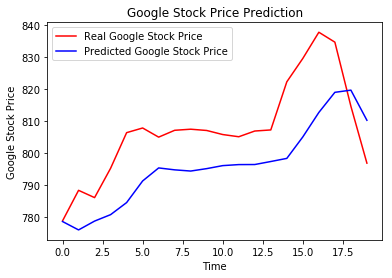

In [94]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [97]:
X_test[]

(20, 60, 1)